#### Import Required Libraries

In [184]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

sns.set_context("talk")

#### Load Data

In [185]:
df =  pd.read_excel("Energy Generation.xlsx")

display(df.head(10))
print(df.shape)

,Zone_Name,Year,Name_Of_Power_Plant,Type_Of_Fuel,Generation_Capacity_Installed,Unit1,Annual_Plant_factor,Unit2,Net_Efficiency,Unit3,Net_Energy_Generation,Unit4
0,Dhaka,2018,Ghorasal 2X55 MW ST,Gas,110.0,MW,45.30,Percentage,24.89,Percentage,314.96,GWH
1,Dhaka,2018,Ghorasal 2X210 MW ST,Gas,420.0,MW,34.82,Percentage,30.96,Percentage,975.63,GWH
2,Dhaka,2018,Ghorasal 210 MW ST (5+6th Unit),Gas,210.0,MW,27.66,Percentage,27.77,Percentage,424.30,GWH
3,Dhaka,2018,Ghorasal 210 MW 7th,Gas,365.0,MW,38.57,Percentage,44.91,Percentage,1166.41,GWH
4,Dhaka,2018,Tongi 105 MW GT,Gas,105.0,MW,0.00,Percentage,0.00,Percentage,-2.81,GWH
5,Dhaka,2018,Haripur 3X33 MW GT,Gas,64.0,MW,22.99,Percentage,19.98,Percentage,79.47,GWH
6,Dhaka,2018,Siddhirganj 210 MW ST,Gas,210.0,MW,16.23,Percentage,29.38,Percentage,144.75,GWH
7,Dhaka,2018,Siddhirganj 2x120 MW GT,Gas,210.0,MW,36.01,Percentage,26.19,Percentage,636.82,GWH
8,Dhaka,2018,Haripur 412 MW CCPP,Gas,412.0,MW,87.42,Percentage,56.13,Percentage,3030.87,GWH
9,Dhaka,2018,RPCL Gazipur 52 MW,F. oil,52.0,MW,68.35,Percentage,39.05,Percentage,302.62,GWH


(199, 12)


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zone_Name                      199 non-null    object 
 1   Year                           199 non-null    int64  
 2   Name_Of_Power_Plant            199 non-null    object 
 3   Type_Of_Fuel                   199 non-null    object 
 4   Generation_Capacity_Installed  194 non-null    float64
 5   Unit1                          199 non-null    object 
 6   Annual_Plant_factor            187 non-null    float64
 7   Unit2                          199 non-null    object 
 8   Net_Efficiency                 184 non-null    float64
 9   Unit3                          199 non-null    object 
 10  Net_Energy_Generation          196 non-null    float64
 11  Unit4                          199 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1

In [187]:
df.describe()

,Year,Generation_Capacity_Installed,Annual_Plant_factor,Net_Efficiency,Net_Energy_Generation
count,199.000000,194.000000,187.000000,184.000000,196.000000
mean,2019.020101,161.159794,39.365668,33.187880,517.675186
std,0.810037,117.101746,37.979064,11.027779,656.220404
min,2018.000000,0.000000,0.000000,0.000000,-19.630000
25%,2018.000000,60.000000,15.900000,26.767500,52.526600
50%,2019.000000,150.000000,34.660000,34.310000,276.545850
75%,2020.000000,220.000000,57.800000,39.900000,702.138050
max,2020.000000,622.000000,310.270000,56.470000,3030.870000


#### Find Total Number Of Null Values

In [188]:
df.isnull().sum()

Zone_Name                         0
Year                              0
Name_Of_Power_Plant               0
Type_Of_Fuel                      0
Generation_Capacity_Installed     5
Unit1                             0
Annual_Plant_factor              12
Unit2                             0
Net_Efficiency                   15
Unit3                             0
Net_Energy_Generation             3
Unit4                             0
dtype: int64

In [189]:
df.columns

Index(['Zone_Name', 'Year', 'Name_Of_Power_Plant', 'Type_Of_Fuel',
       'Generation_Capacity_Installed', 'Unit1', 'Annual_Plant_factor',
       'Unit2', 'Net_Efficiency', 'Unit3', 'Net_Energy_Generation', 'Unit4'],
      dtype='object')

#### Drop Features

In [190]:
def clean(df):
    df=df.drop(['Unit1', 'Unit2', 'Unit3', 'Unit4'],axis=1)
    
    return df
df=clean(df)

#### Label Encoding

In [191]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['Zone_Name', 'Name_Of_Power_Plant', 'Type_Of_Fuel']

for col in columns:
    df[col]=le.fit_transform(df[col])
    
    print(le.classes_)

['Barisal' 'Chattogram' 'Cumilla' 'Dhaka' 'Joint Venture' 'Khulna'
 'Rajshahi' 'Rangpur' 'Sylhet']
['210 MW Siddhirganj TPP' 'Ashuganj (North) 450 MW CCPP'
 'Ashuganj (South) 450 MW CCPP' 'Ashuganj 225 MW CCPP'
 'Ashuganj 2x150 MW Steam Turbine' 'Ashuganj 2x64 MW Steam Turbine'
 'Ashuganj 2x64 MW Steam Turbine (1,2)'
 'Ashuganj 3x150 MW Steam Turbine (3,4,5)' 'Ashuganj 50 MW GE'
 'Ashuganj 50 MW PP' 'Ashuganj TPP Unit-3' 'Ashuganj TPP Unit-4'
 'Ashuganj TPP Unit-5' 'Baghabari 100 MW/GT' 'Baghabari 100 MW/GTPP'
 'Baghabari 50 MW Peaking PP' 'Baghabari 50 MW Peaking RE'
 'Baghabari 71 MW/GT' 'Baghabari 71 MW/GTPP'
 'Barapukuria 275 MW TPP Unit-3' 'Barapukuria TPP Unit -1,2'
 'Barapukyria Coal based S/T (Unit 1,2)'
 'Barapukyria Coal based S/T (Unit 3)' 'Barishal 2x20 MW/GT'
 'Bera 70 MW Peaking PP' 'Bera 70 MW Peaking RE' 'Bheramara 360 MW CCPP'
 'Bheramara 360 MW CCPP (NWPGCL)' 'Bheramara 3x20MW /GT'
 'Bheramara GT Unit-1,2 & 3' 'Bheramara GT unit-3' 'Bhola 225 MW CCPP'
 'Bibiyana III 4

In [192]:
df.head(10)

,Zone_Name,Year,Name_Of_Power_Plant,Type_Of_Fuel,Generation_Capacity_Installed,Annual_Plant_factor,Net_Efficiency,Net_Energy_Generation
0,3,2018,55,3,110.0,45.30,24.89,314.96
1,3,2018,54,3,420.0,34.82,30.96,975.63
2,3,2018,53,3,210.0,27.66,27.77,424.30
3,3,2018,52,3,365.0,38.57,44.91,1166.41
4,3,2018,131,3,105.0,0.00,0.00,-2.81
5,3,2018,63,3,64.0,22.99,19.98,79.47
6,3,2018,110,3,210.0,16.23,29.38,144.75
7,3,2018,111,3,210.0,36.01,26.19,636.82
8,3,2018,64,3,412.0,87.42,56.13,3030.87
9,3,2018,85,1,52.0,68.35,39.05,302.62


#### Fill The Null Values

In [193]:
import math
df['Generation_Capacity_Installed'].fillna(df['Generation_Capacity_Installed'].median(), inplace=True)
df['Annual_Plant_factor'].fillna(df['Annual_Plant_factor'].median(), inplace=True)
df['Net_Efficiency'].fillna(df['Net_Efficiency'].median(), inplace=True)
df['Net_Energy_Generation'].fillna(df['Net_Energy_Generation'].median(), inplace=True)

df.isnull().sum()

Zone_Name                        0
Year                             0
Name_Of_Power_Plant              0
Type_Of_Fuel                     0
Generation_Capacity_Installed    0
Annual_Plant_factor              0
Net_Efficiency                   0
Net_Energy_Generation            0
dtype: int64

#### Find Correlation Between The Variables

#### Assumptions:

#### 1. Net Energy Generation Increases when Generation Capacity Installed Increases.
#### 2. Net Energy Generation Increases when Annual Plant Factor Increases. 
#### 3. Net Energy Generation Increases when Net Efficiency Increases.
#### 4. Net Energy Generation Increases every year.

In [194]:
df_cor = df.corr()

display(df_cor)

,Zone_Name,Year,Name_Of_Power_Plant,Type_Of_Fuel,Generation_Capacity_Installed,Annual_Plant_factor,Net_Efficiency,Net_Energy_Generation
Zone_Name,1.000000,0.023575,0.098025,-0.203207,-0.082165,0.136208,-0.072411,-0.064725
Year,0.023575,1.000000,-0.039854,-0.064234,0.054488,-0.069718,0.180311,0.028773
Name_Of_Power_Plant,0.098025,-0.039854,1.000000,0.232117,-0.150181,0.008942,-0.107981,-0.228892
Type_Of_Fuel,-0.203207,-0.064234,0.232117,1.000000,-0.116610,0.016765,-0.260923,-0.055746
Generation_Capacity_Installed,-0.082165,0.054488,-0.150181,-0.116610,1.000000,0.313187,0.416728,0.773264
Annual_Plant_factor,0.136208,-0.069718,0.008942,0.016765,0.313187,1.000000,0.424807,0.429935
Net_Efficiency,-0.072411,0.180311,-0.107981,-0.260923,0.416728,0.424807,1.000000,0.551078
Net_Energy_Generation,-0.064725,0.028773,-0.228892,-0.055746,0.773264,0.429935,0.551078,1.000000


#### Heatmap of Correlation

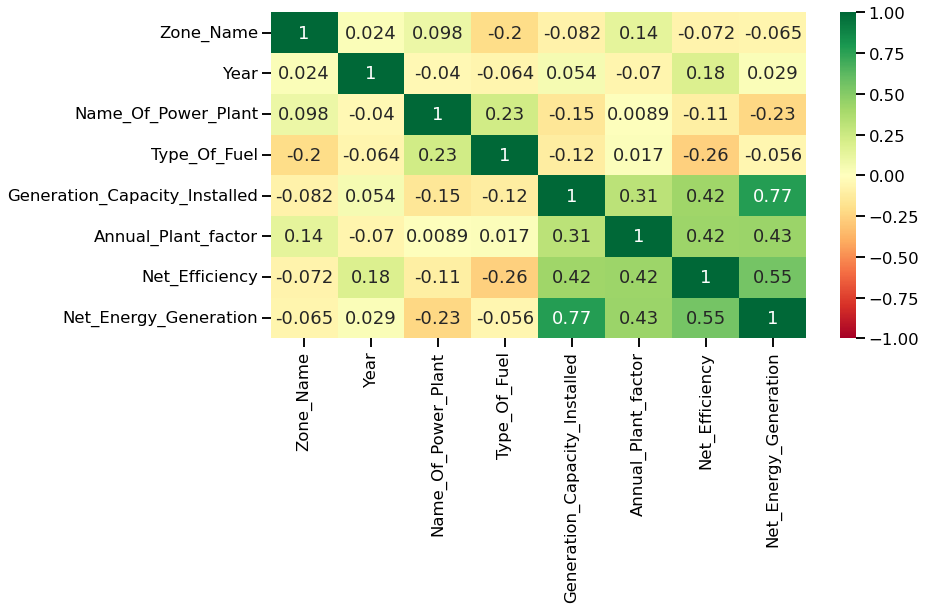

In [195]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.show()

#### See Features

In [196]:
df.columns

Index(['Zone_Name', 'Year', 'Name_Of_Power_Plant', 'Type_Of_Fuel',
       'Generation_Capacity_Installed', 'Annual_Plant_factor',
       'Net_Efficiency', 'Net_Energy_Generation'],
      dtype='object')

#### Separating The Features and Target Variable

In [197]:
features = ['Generation_Capacity_Installed', 'Annual_Plant_factor', 'Net_Efficiency']
target = ['Net_Energy_Generation']

X = df[features]
y = df[target]

print(X.shape, y.shape)


(199, 3) (199, 1)


#### Train & Test Data

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(159, 3) (40, 3) (159, 1) (40, 1)


#### Linear Regression

In [199]:
LR = LinearRegression()

LR = LR.fit(X_train, y_train)

In [200]:
y_pred = LR.predict(X_test)

In [201]:
print(y_pred)

[[ 887.89608166]
 [ 417.80533415]
 [ 686.45938825]
 [1584.9829541 ]
 [ 221.32954846]
 [ 834.18564578]
 [ 425.12213146]
 [-291.64092943]
 [ 560.79754006]
 [ 125.42349963]
 [-661.60553235]
 [ -93.77015229]
 [ 668.55469589]
 [ 201.71773482]
 [  25.13219334]
 [1177.53959627]
 [ 303.11158087]
 [ 502.28757412]
 [1254.72560341]
 [ 441.1598738 ]
 [ 791.17844896]
 [1463.39116407]
 [-227.17968314]
 [ 111.1635302 ]
 [1481.12269106]
 [ 905.95003094]
 [ 505.58294374]
 [ 608.22414326]
 [ 807.00373908]
 [ 582.56571566]
 [ 347.41625591]
 [ 162.90331314]
 [ 347.60115121]
 [-131.22039459]
 [-564.15342213]
 [1515.60554259]
 [ 997.69250163]
 [ 751.85406156]
 [  54.51011458]
 [ 302.46985877]]


In [202]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [203]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  268.91388505155584
MSE =  114508.62679589773
RMSE =  338.3912333319197
r_squared 73.0072636316565


#### KNN Regressor

In [204]:
from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor() 
KNN=KNN.fit(X_train, y_train)

In [205]:
y_pred = KNN.predict(X_test)

In [206]:
print(y_pred)

[[ 769.71194]
 [ 215.4283 ]
 [ 549.93708]
 [2211.5913 ]
 [ 189.47824]
 [ 272.84983]
 [ 112.24824]
 [  65.92226]
 [ 193.67138]
 [  69.55112]
 [   3.308  ]
 [  54.0905 ]
 [ 318.78482]
 [ 255.2903 ]
 [  30.34672]
 [1761.1633 ]
 [ 345.4117 ]
 [ 261.63338]
 [1761.1633 ]
 [ 142.67824]
 [ 117.16356]
 [2211.5913 ]
 [  33.7845 ]
 [  38.902  ]
 [1953.1793 ]
 [ 849.89489]
 [ 112.24824]
 [ 628.03238]
 [ 430.36115]
 [ 532.49866]
 [ 192.27082]
 [  97.23112]
 [ 173.97814]
 [  53.586  ]
 [  42.04074]
 [1544.07142]
 [1028.90222]
 [ 552.50311]
 [ 189.47824]
 [ 452.75192]]


In [207]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [208]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  157.37035675
MSE =  61630.7005745312
RMSE =  248.25531328559958
r_squared 85.4720006749375


#### Gradient Boosting Regressor

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

GB=GradientBoostingRegressor() 
GB=GB.fit(X_train, y_train.values.ravel())


In [210]:
y_pred = GB.predict(X_test)

In [211]:
print(y_pred)

[ 723.16752642  146.41529001  212.70894524 2402.34563837  111.94781526
  109.98808316  194.33393162   64.72677221  202.60360443   37.67295077
   -3.20853177   30.43934924  450.29530947  237.59786857   39.60702696
 1596.3647743   462.71011673  329.71371577 1670.11577426  222.43749923
 -136.087034   1954.90133504   -7.87751692   19.55418881 2091.30553372
  632.37165732  249.88295031  532.1145251   378.20159773  421.6850295
  142.01948005   83.8687549   269.88442715   20.88603013  136.0008548
  968.75866102 1311.45578122  491.60251938   68.02891693  486.76048106]


In [212]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [213]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  150.8689135786579
MSE =  70961.06758690768
RMSE =  266.3851865005028
r_squared 83.27258440358641


#### Random Forest Regressor

In [214]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor() 
RFR=RFR.fit(X_train, y_train.values.ravel())


In [215]:
y_pred = RFR.predict(X_test)

In [216]:
print(y_pred)

[8.71614999e+02 2.63943505e+02 1.43898881e+02 2.38542971e+03
 3.19678940e+01 2.50862627e+02 1.33298715e+02 2.28266047e+01
 1.57670926e+02 6.88935130e+01 3.91318800e-01 6.45212500e+01
 2.49204358e+02 2.17366910e+02 4.08979140e+01 1.60354249e+03
 4.46557929e+02 2.97225145e+02 1.62362596e+03 8.85322100e+01
 8.67839130e+01 1.91229734e+03 4.62191900e+00 4.20853640e+01
 1.96032777e+03 7.81143950e+02 1.40346879e+02 6.40511420e+02
 2.64711148e+02 4.50631224e+02 1.72192854e+02 9.21837540e+01
 2.39300243e+02 4.57826300e+01 3.46163327e+01 1.18629646e+03
 1.19953667e+03 6.40753591e+02 2.78148670e+01 4.69591356e+02]


In [217]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [218]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  128.8420897416667
MSE =  52123.4323931804
RMSE =  228.30556802929797
r_squared 87.71311726836028


#### Decision Tree Regressor

In [219]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor() 
DTR=DTR.fit(X_train, y_train)


In [220]:
y_pred = DTR.predict(X_test)

In [221]:
print(y_pred)

[ 9.45456900e+02  2.71200000e+02  3.40000000e-01  2.45847000e+03
  1.49000000e+00  9.45800000e+01  1.56411300e+02  1.49000000e+00
  1.04800000e+02  8.29046000e+01  2.50000000e-02  6.27900000e+01
  3.40000000e-01  1.72528100e+02  9.22000000e+00  1.63794000e+03
  4.45920000e+02  3.13310000e+02  1.63794000e+03  3.66520000e+02
  5.91000000e+00  1.75900000e+03  2.14800000e-01  3.95000000e+01
  1.99903710e+03  9.45456900e+02  1.25105600e+02  6.50500600e+02
  5.48920000e+01  6.15680000e+02  1.29210000e+02  8.29046000e+01
  3.66520000e+02  4.40500000e+01 -3.63433333e-01  9.00900000e+02
  1.35114000e+03  9.59030000e+02  1.49000000e+00  4.79631100e+02]


In [222]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [223]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  149.76093958333334
MSE =  74153.84655834426
RMSE =  272.31203895227304
r_squared 82.51996127404708


#### Lasso

In [224]:
from sklearn.linear_model import Lasso

L=Lasso() 
L=L.fit(X_train, y_train)

In [225]:
y_pred = L.predict(X_test)

In [226]:
print(y_pred)

[ 887.81123836  417.70105515  686.4641906  1584.82769971  221.45070348
  834.11118575  425.11735435 -291.26813587  560.85939514  125.35226359
 -661.26120171  -93.63973171  668.5661734   201.76891655   25.17933859
 1177.5620567   303.14147192  502.4023634  1254.70225638  441.17373232
  791.09067206 1463.32588663 -226.9850234   111.09440668 1481.02453936
  905.87333476  505.5112742   608.30017478  806.96426959  582.64533258
  347.3318972   162.81791675  347.68490907 -131.13181246 -563.79496976
 1515.53863614  997.49358635  751.87085762   54.7549512   302.51295741]


In [227]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [228]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  268.8935633010502
MSE =  114495.41927527582
RMSE =  338.3717176054698
r_squared 73.0103769964064


#### Bayesian Ridge Regression

In [229]:
from sklearn.linear_model import BayesianRidge

BR=BayesianRidge() 
BR=BR.fit(X_train, y_train.values.ravel())

In [230]:
y_pred=BR.predict(X_test)

In [231]:
print(y_pred)

[ 874.854449    396.59853358  686.70911533 1559.16885437  240.36459469
  819.16962654  421.47519764 -223.75076634  569.63474381  108.93050108
 -599.17490713  -71.28059592  668.26435062  211.29658777   30.43687762
 1183.58902162  312.83881595  522.03417798 1252.67936307  443.20928516
  769.50641727 1454.01189195 -193.82159728   94.10687187 1464.02585819
  893.98289284  488.67778508  623.17890757  799.7812439   597.16051819
  329.24749239  144.20253174  363.23093382 -116.85238229 -495.06088659
 1501.53102621  963.47643736  758.55939731   97.51004949  315.6260306 ]


In [232]:
print(y_test)

     Net_Energy_Generation
175             1251.00000
40               287.82000
34                -4.69000
90              2427.89700
145                1.07000
182              660.10000
95               169.26000
4                 -2.81000
29               194.59000
167               70.05830
53                 0.00000
18                20.39210
11               342.50000
161               53.81880
147               35.15000
117             1531.47000
105              445.80000
35               318.89000
110             1755.18360
58               441.27990
51              1003.05000
16              2161.51070
44                 0.73000
93                33.05760
31              1789.83000
184             1236.00000
38               175.19000
28               626.84000
171              772.25390
27               463.93000
47               204.57000
164               94.44490
59               153.10140
143               37.50000
148               -0.12000
122             1081.55000
1

In [233]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("MAE = ", MAE)
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("r_squared",(r_squared * 100))

MAE =  264.0843158086076
MSE =  111953.07013144353
RMSE =  334.59388836534885
r_squared 73.60967647379921


In [234]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('KNN Regressor', KNeighborsRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Lasso', Lasso()))
models.append(('Bayesian Ridge', BayesianRidge()))
names = []
r2score = []
mae=[]
mse=[]
rmse=[]
for name, model in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    r2score.append((r2_score(y_test, y_pred))*100)
    mae.append(mean_absolute_error(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))
    names.append(name)
tr_split = pd.DataFrame({'Regression Models': names, 'R2_Score': r2score, 'MAE': mae, 'MSE': mse, 'RMSE': rmse })
tr_split

,Regression Models,R2_Score,MAE,MSE,RMSE
0,Linear Regression,73.007264,268.913885,114508.626796,338.391233
1,KNN Regressor,85.472001,157.370357,61630.700575,248.255313
2,Gradient Boosting,84.475069,148.629227,65859.884152,256.631807
3,Random Forest,87.129980,131.880861,54597.216941,233.660474
4,Decision Tree,83.741619,141.930804,68971.330074,262.623933
5,Lasso,73.010377,268.893563,114495.419275,338.371718
6,Bayesian Ridge,73.609676,264.084316,111953.070131,334.593888


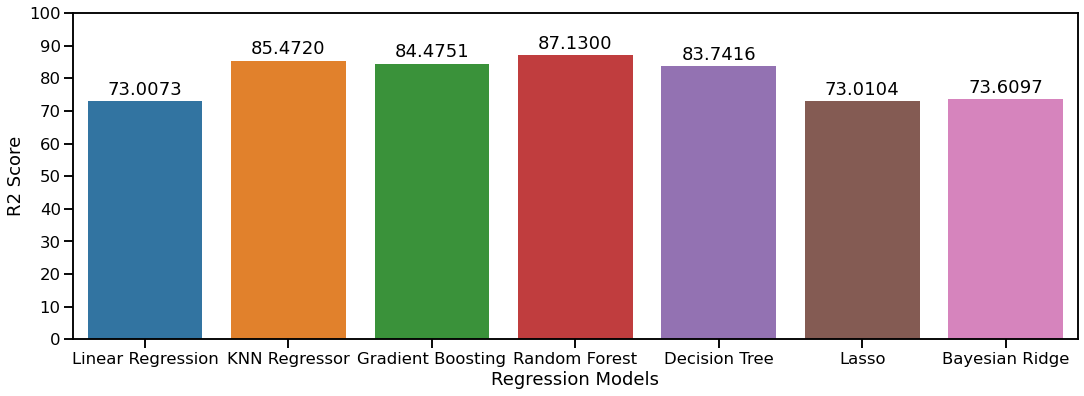

In [235]:
plt.figure(figsize=(18,6))
axis = sns.barplot(x = 'Regression Models', y = 'R2_Score', data =tr_split )
axis.set(xlabel='Regression Models', ylabel='R2 Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 2, '{:1.4f}'.format(height), ha="center") 
plt.yticks(np.arange(0,110,10))   
plt.show()

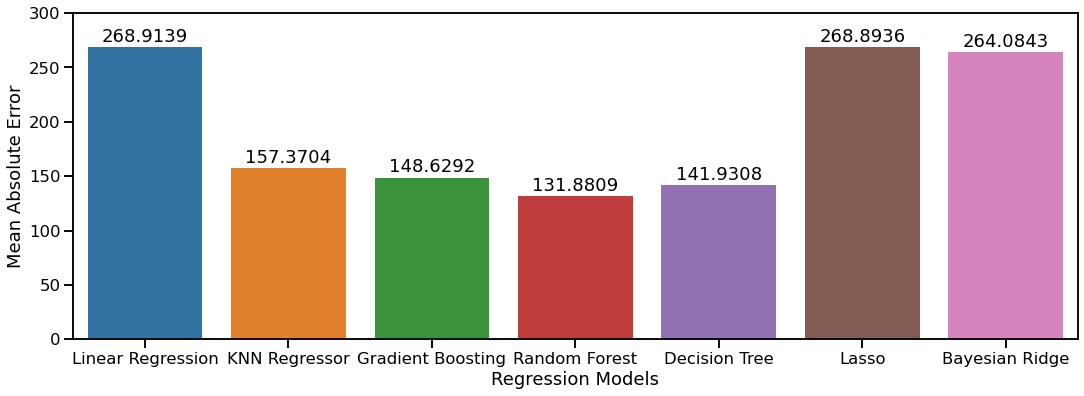

In [236]:
plt.figure(figsize=(18,6))
axis = sns.barplot(x = 'Regression Models', y = 'MAE', data =tr_split )
axis.set(xlabel='Regression Models', ylabel='Mean Absolute Error')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 5.0, '{:1.4f}'.format(height), ha="center") 
plt.yticks(np.arange(0,310,50))   
plt.show()

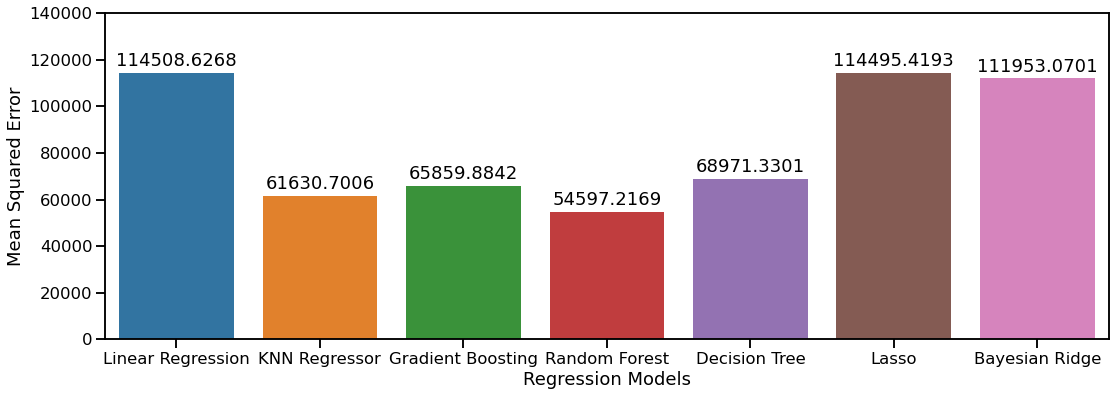

In [237]:
plt.figure(figsize=(18,6))
axis = sns.barplot(x = 'Regression Models', y = 'MSE', data =tr_split )
axis.set(xlabel='Regression Models', ylabel='Mean Squared Error')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 3000, '{:1.4f}'.format(height), ha="center") 
plt.yticks(np.arange(0,150000,20000))   
plt.show()

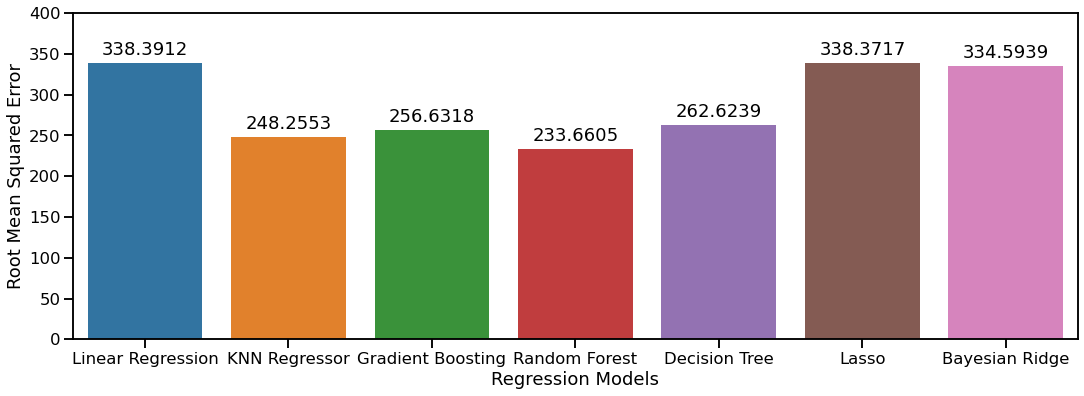

In [238]:
plt.figure(figsize=(18,6))
axis = sns.barplot(x = 'Regression Models', y = 'RMSE', data =tr_split )
axis.set(xlabel='Regression Models', ylabel='Root Mean Squared Error')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 10, '{:1.4f}'.format(height), ha="center") 
plt.yticks(np.arange(0,410,50))   
plt.show()